In [61]:
# Importing the required libraries
import csv
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [62]:
trip_data = pd.read_csv("trip_sample.csv")

In [63]:
trip_data.drop(trip_data.columns[[0]], axis=1, inplace=True)

In [64]:
trip_data.columns.tolist()

['medallion',
 'hack_license',
 'vendor_id',
 'rate_code',
 'store_and_fwd_flag',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_time_in_secs',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'hour',
 'day',
 'drop_zip',
 'pickup_zip',
 'mins']

In [65]:
trip_data.shape

(148245, 26)

In [66]:
#' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude'
trip_data = trip_data[(trip_data['pickup_longitude'] !=0) & (trip_data['pickup_latitude'] !=0) & \
                      (trip_data['dropoff_longitude'] !=0) & (trip_data['dropoff_latitude'] !=0)]
trip_data.shape

(148245, 26)

In [67]:
trip_data.shape

(148245, 26)

In [68]:
# trip_data = trip_data[(trip_data['pickup_longitude'] >= -74.05) & (trip_data['pickup_latitude'] >= 40.60) & \
#                       (trip_data['dropoff_longitude'] >= -74.05) & (trip_data['dropoff_latitude'] >= 40.60)]

# trip_data = trip_data[(trip_data['pickup_longitude'] <= -73.85) & (trip_data['pickup_latitude'] <= 40.90) & \
#                       (trip_data['dropoff_longitude'] <= -73.85) & (trip_data['dropoff_latitude'] <= 40.90)]
# trip_data.shape

In [69]:
trip_data = trip_data[(trip_data['passenger_count'] > 0) & (trip_data['passenger_count'] < 8)]
trip_data.shape

(148245, 26)

In [70]:
trip_data = trip_data[(trip_data['pickup_longitude'] != trip_data['dropoff_longitude'])\
                      & (trip_data['dropoff_latitude'] != trip_data['pickup_latitude'])]

trip_data = trip_data[(trip_data['pickup_datetime'] != trip_data['dropoff_datetime'] )]

trip_data.shape

(146695, 26)

In [71]:
trip_data = trip_data[trip_data['fare_amount'] >= (2.5 + trip_data['mins']*0.20 \
                                                   + trip_data['trip_distance']*2)]

trip_data.shape

(136346, 26)

In [72]:
def get_miles_hour(row):
    try:
        return (row['trip_distance']*60*60)/(row['trip_time_in_secs']) # miles per hour.
    except:
        return 0


In [73]:
trip_data['mile_per_hour'] = trip_data.apply(get_miles_hour, axis=1, raw=True)

In [74]:
trip_data['mile_per_hour'].value_counts()

0.000000     612
9.000000     543
12.000000    495
8.400000     383
15.000000    366
12.600000    365
13.200000    335
9.600000     273
10.800000    267
6.600000     267
10.000000    254
10.200000    249
11.400000    239
7.500000     234
13.800000    231
8.700000     228
10.500000    227
14.400000    222
11.250000    220
8.000000     212
7.200000     212
6.000000     212
9.900000     207
18.000000    195
7.800000     191
10.285714    188
13.500000    177
9.300000     175
12.857143    173
8.571429     165
            ... 
19.671257      1
11.160000      1
18.753830      1
28.213166      1
14.413727      1
5.229358       1
6.671079       1
36.172249      1
15.291429      1
17.208000      1
27.768000      1
15.036364      1
18.212479      1
42.469136      1
28.618593      1
27.781350      1
9.016698       1
22.605000      1
20.900705      1
10.917574      1
20.635294      1
0.672000       1
10.324190      1
27.276923      1
12.493333      1
18.023715      1
21.707126      1
8.927336      

In [37]:
trip_data.groupby(['mile_per_hour'], as_index=False).fare_amount.agg({'sum' : np.sum,'std': np.std,\
                                                                               'mean': np.mean }).\
                                                                                    sort('std',ascending = False)

,mile_per_hour,std,sum,mean
34655,46.956522,94.752309,146.00,73.000000
34136,39.876923,71.417785,162.00,81.000000
34725,49.500000,63.109280,193.25,96.625000
32387,32.225064,39.951533,78.50,39.250000
31060,28.900000,39.597980,92.00,46.000000
4310,5.882353,39.154076,144.50,24.083333
33637,37.090909,37.476659,93.00,46.500000
29148,25.297297,35.708892,68.50,34.250000
1308,3.422053,34.294679,70.50,35.250000
31145,29.068323,32.880465,57.50,28.750000


In [75]:
trip_data['average_speed_this_hour'] = trip_data['mile_per_hour'].groupby(trip_data["hour"]).transform(np.mean)
trip_data['average_speed_this_hour'] = trip_data['average_speed_this_hour'].apply(lambda x: int(x))
trip_data['COUNTER'] = 1
trip_data['count_of_rides'] = trip_data['COUNTER'].groupby(trip_data["hour"]).transform(np.sum)
trip_data['distance_square'] = trip_data['trip_distance'].apply(lambda x: x*x)

In [76]:
trip_data.shape

(136346, 31)

In [42]:
trip_data.columns.tolist()

['medallion',
 'hack_license',
 'vendor_id',
 'rate_code',
 'store_and_fwd_flag',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_time_in_secs',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'hour',
 'day',
 'drop_zip',
 'pickup_zip',
 'mins',
 'mile_per_hour',
 'average_speed_this_hour',
 'COUNTER',
 'count_of_rides']

In [77]:
trip_data['date'] = trip_data['pickup_datetime'].apply(lambda x: x.split(" ")[0].split("-")[2])
trip_data["date"].value_counts()

05    5186
12    5046
20    5027
06    4891
13    4889
04    4864
19    4860
26    4853
11    4820
27    4802
18    4778
03    4691
10    4675
25    4667
17    4665
16    4579
02    4577
23    4486
09    4475
24    4457
14    4362
30    4348
15    4165
29    4159
07    4156
28    4120
21    4092
22    3956
08    3947
01    3753
Name: date, dtype: int64

In [117]:
trip_data.payment_type = pd.Categorical(trip_data.payment_type)

In [118]:
trip_data['payment_code'] = trip_data.payment_type.cat.codes

In [130]:
columns = ['hour',
 'day',
 'date',
 'drop_zip',
 'pickup_zip',
 'distance_square',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'average_speed_this_hour',
           'count_of_rides',
           'passenger_count',
           'payment_code'
          ]

target = ["tip_amount"]

In [131]:
# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split



train = trip_data.sample(frac=0.8, random_state=1)
test = trip_data.loc[~trip_data.index.isin(train.index)]


In [132]:
# Import the linearregression model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Initialize the model class.

model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
print mean_squared_error(predictions, test[target])
print r2_score(predictions, test[target])

1.80175171993
0.265733157776


In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
max_feat = ['sqrt']

leaf = [1]

estimators = [500]

for e in estimators:
    for l in leaf:
        for m in max_feat:
            print e,l,m
            model = RandomForestRegressor(n_estimators=e, min_samples_leaf=l, max_features = m,random_state=1)
            model.fit(train[columns], train[target])
            # Generate our predictions for the test set.
            predictions = model.predict(test[columns])
            # Compute error between our test predictions and the actual values.
            print mean_squared_error(predictions, test[target])
            print r2_score(predictions, test[target])

500 1 sqrt
1.026723373
0.678619907039


Feature ranking:
1. feature trip_distance (0.315883)
2. feature distance_square (0.302560)
3. feature pickup_longitude (0.073500)
4. feature dropoff_longitude (0.070749)
5. feature drop_zip (0.067379)
6. feature pickup_zip (0.061610)
7. feature dropoff_latitude (0.041412)
8. feature pickup_latitude (0.037630)
9. feature hour (0.005507)
10. feature date (0.005334)
11. feature average_speed_this_hour (0.005108)
12. feature count_of_rides (0.004621)
13. feature day (0.004169)
14. feature payment_code (0.002781)
15. feature passenger_count (0.001757)


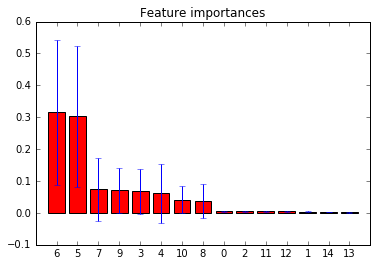

In [129]:
#6.48317570173
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

X = train[columns]
l = X.columns.tolist()

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, l[indices[f]], importances[indices[f]]))

    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error

xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth':[4] ,#[2,4,6,10,14],
                    'n_estimators':[100] #[50,100,200,300,400,500,600],
#                      'gamma':[0,0.5,1],
#                      'min_child_weight': [1,5,6,7,10], 
#                      'subsample': [0.5,0.6,0.7,1]
                     }, verbose=1)
clf.fit(train[columns],train[target])

print(clf.best_score_)
print(clf.best_params_)

clf.fit(train[columns], train[target])

# Generate our predictions for the test set.
predictions = clf.predict(test[columns])

# Compute error between our test predictions and the actual values.
print mean_squared_error(predictions, test[target])
print r2_score(predictions, test[target])